In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#Deleting unneccessary columns
df = df.drop(['url', 'address','phone','reviews_list','menu_item'], axis = 1)
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [5]:
#Renaming the column names
df.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost_for_2_people',
       'listed_in_type', 'listed_in_city'],
      dtype='object')

In [6]:
#Rate column
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)

In [8]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [9]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [10]:
#Cost column
df['approx_cost_for_2_people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [11]:
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].str.replace('nan','Nan')
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].fillna('Nan')
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].str.replace(',','')

In [12]:
df['approx_cost_for_2_people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '80', '50', '190', '1700', 'Nan', '180', '1350', '2200', '1400',
       '2000', '1800', '1900', '330', '2500', '2100', '3000', '2800',
       '3400', '40', '1250', '3500', '4000', '2400', '2600', '120',
       '1450', '469', '70', '3200', '60', '240', '6000', '1050', '2300',
       '4100', '5000', '3700', '1650', '2700', '4500', '140', '360'],
      dtype=object)

In [13]:
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].astype(float)

In [14]:
df['approx_cost_for_2_people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
         80.,   50.,  190., 1700.,   nan,  180., 1350., 2200., 1400.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  240., 6000., 1050., 2300., 4100., 5000.,
       3700., 1650., 2700., 4500.,  140.,  360.])

In [15]:
df['rest_type'].value_counts()

Quick Bites                   18003
Casual Dining                 10066
Cafe                           3610
Delivery                       2493
Dessert Parlor                 2188
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      49440 non-null  object 
 1   online_order              49440 non-null  object 
 2   book_table                49440 non-null  object 
 3   rate                      41665 non-null  float64
 4   votes                     49440 non-null  int64  
 5   location                  49419 non-null  object 
 6   rest_type                 49215 non-null  object 
 7   dish_liked                23492 non-null  object 
 8   cuisines                  49395 non-null  object 
 9   approx_cost_for_2_people  49099 non-null  float64
 10  listed_in_type            49440 non-null  object 
 11  listed_in_city            49440 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.5+ MB


In [17]:
#Checking for null values
df.isnull().sum()

name                            0
online_order                    0
book_table                      0
rate                         7775
votes                           0
location                       21
rest_type                     225
dish_liked                  25948
cuisines                       45
approx_cost_for_2_people      341
listed_in_type                  0
listed_in_city                  0
dtype: int64

In [18]:
#Checking of percentage of null values in each column
(df.isna().sum()/df.shape[0])*100

name                         0.000000
online_order                 0.000000
book_table                   0.000000
rate                        15.726133
votes                        0.000000
location                     0.042476
rest_type                    0.455097
dish_liked                  52.483819
cuisines                     0.091019
approx_cost_for_2_people     0.689725
listed_in_type               0.000000
listed_in_city               0.000000
dtype: float64

In [19]:
#Dropping null values from the column having less no of null values
df = df[df['location'].notna()]
df = df[df['rest_type'].notna()]
df = df[df['cuisines'].notna()]
df = df[df['approx_cost_for_2_people'].notna()]

df.isnull().sum()

name                            0
online_order                    0
book_table                      0
rate                         7615
votes                           0
location                        0
rest_type                       0
dish_liked                  25590
cuisines                        0
approx_cost_for_2_people        0
listed_in_type                  0
listed_in_city                  0
dtype: int64

In [20]:
df.rate.replace(np.nan, df.rate.mean(), inplace = True)

In [21]:
df.isnull().sum()

name                            0
online_order                    0
book_table                      0
rate                            0
votes                           0
location                        0
rest_type                       0
dish_liked                  25590
cuisines                        0
approx_cost_for_2_people        0
listed_in_type                  0
listed_in_city                  0
dtype: int64

In [22]:
df.shape

(48878, 12)

# Data Visualizations

### Distribution of rate column

Mean is :  3.7020114872891874


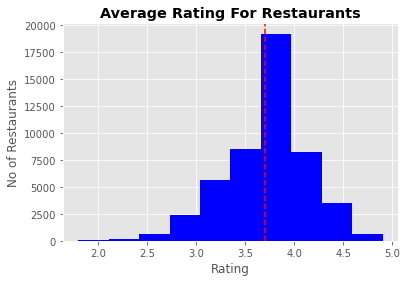

In [23]:
df.rate.hist(color = 'blue')
plt.axvline(x=df.rate.mean(), ls='--',color='red')
plt.title('Average Rating For Restaurants', weight ='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ", df.rate.mean())

Average rating for restaurants in Banglore is 3.7

### Restaurants with Maximum no of orders

In [24]:
df.name.value_counts().head()

Cafe Coffee Day      93
Onesta               85
Just Bake            72
Five Star Chicken    70
Empire Restaurant    69
Name: name, dtype: int64

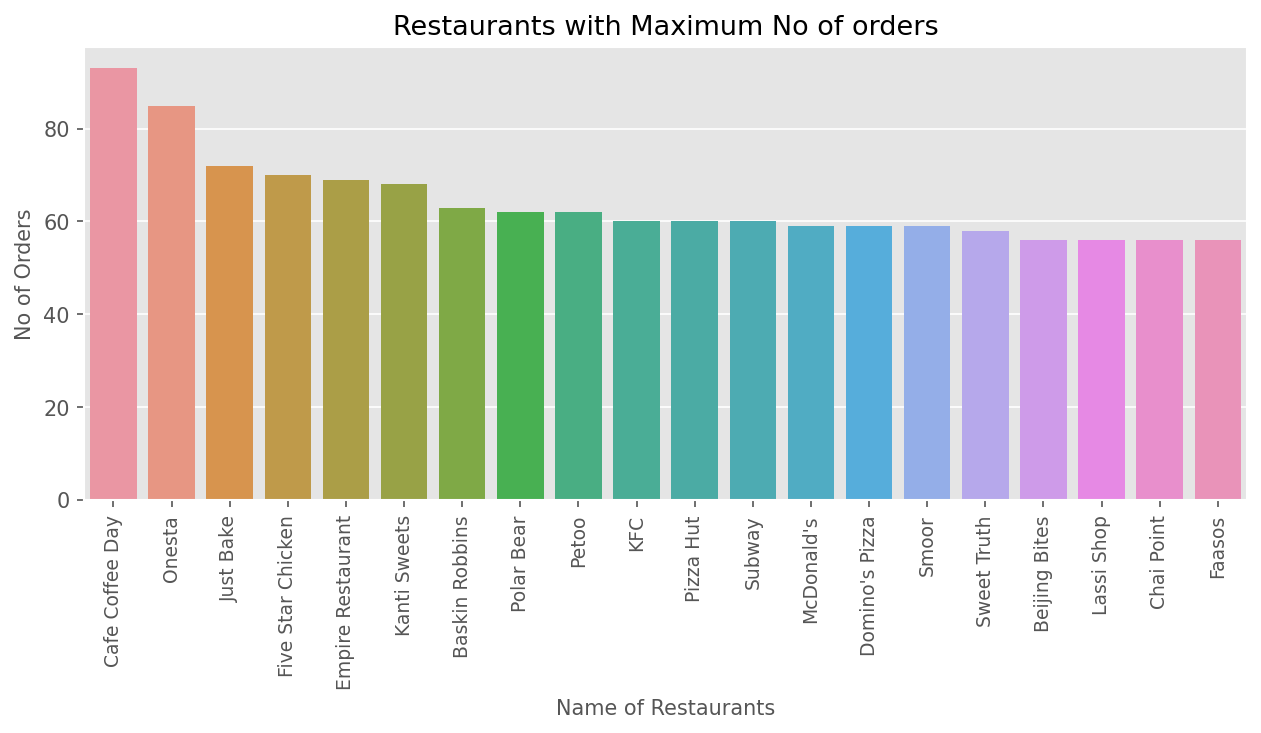

In [25]:
plt.figure(figsize = (10,4), dpi = 150)
order = df['name'].value_counts()[:20]
sns.barplot(x=order.index, y=order)
plt.xlabel('Name of Restaurants', size = 10)
plt.ylabel('No of Orders', size = 10)
plt.title('Restaurants with Maximum No of orders', fontsize = 13)
plt.xticks(fontsize = 9, rotation=90)
plt.show()

We can say that the Cafe Coffee Day and Onesta got slightly higher number of orders compared to other restaurants

### Restaurants providing online order facility

In [26]:
df.online_order.value_counts()

Yes    29211
No     19667
Name: online_order, dtype: int64

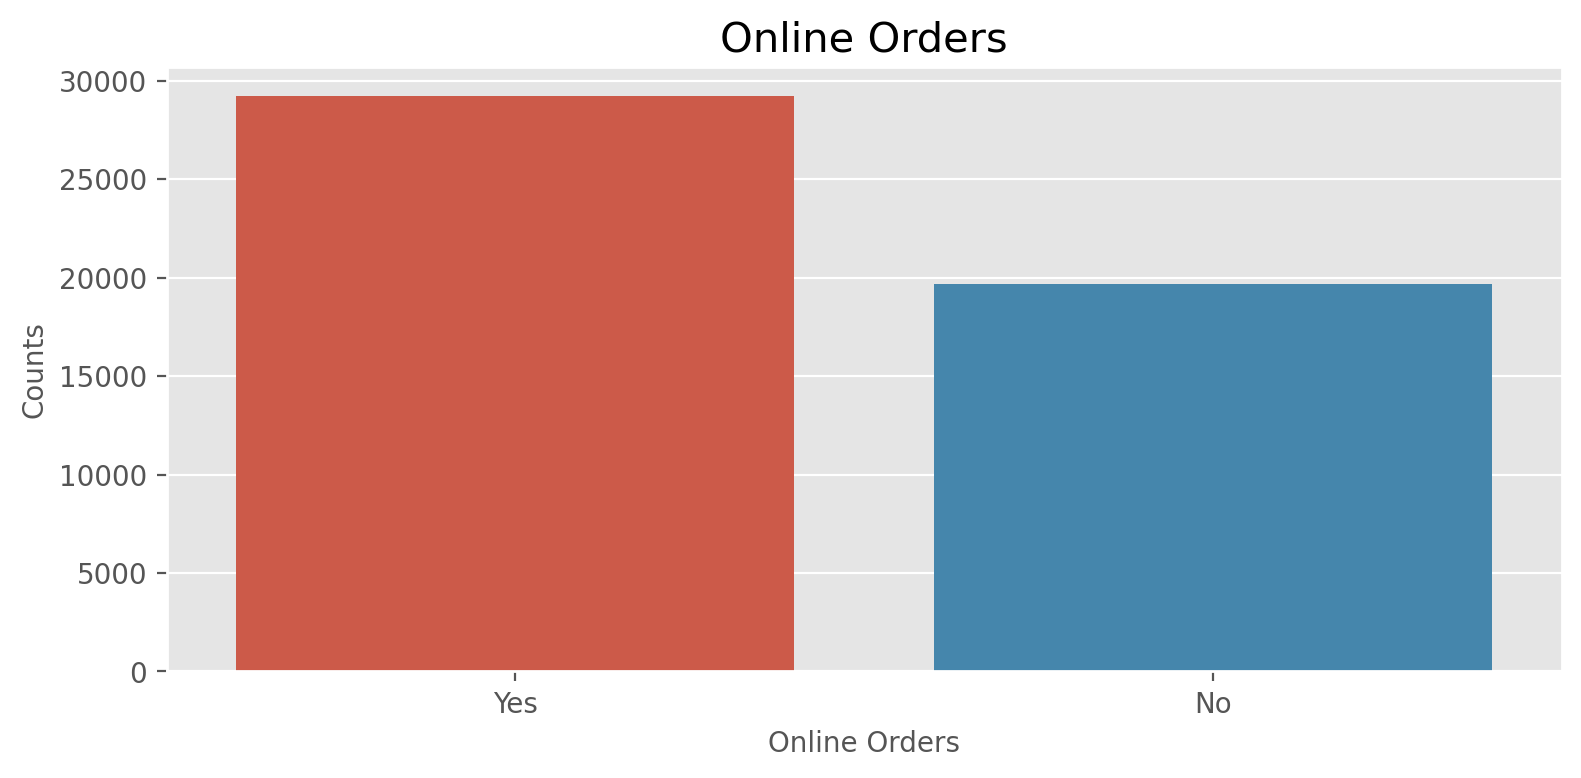

In [33]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('online_order', data = df)
plt.title('Online Orders', fontsize=15)
plt.ylabel('Counts',size=10)
plt.xlabel('Online Orders',size=10)

- Most of restaurants have online order facility
- No missing values in online order column

### Frequency of restaurants having Prebooking table facility

Text(0.5, 0, 'Book Table Facility')

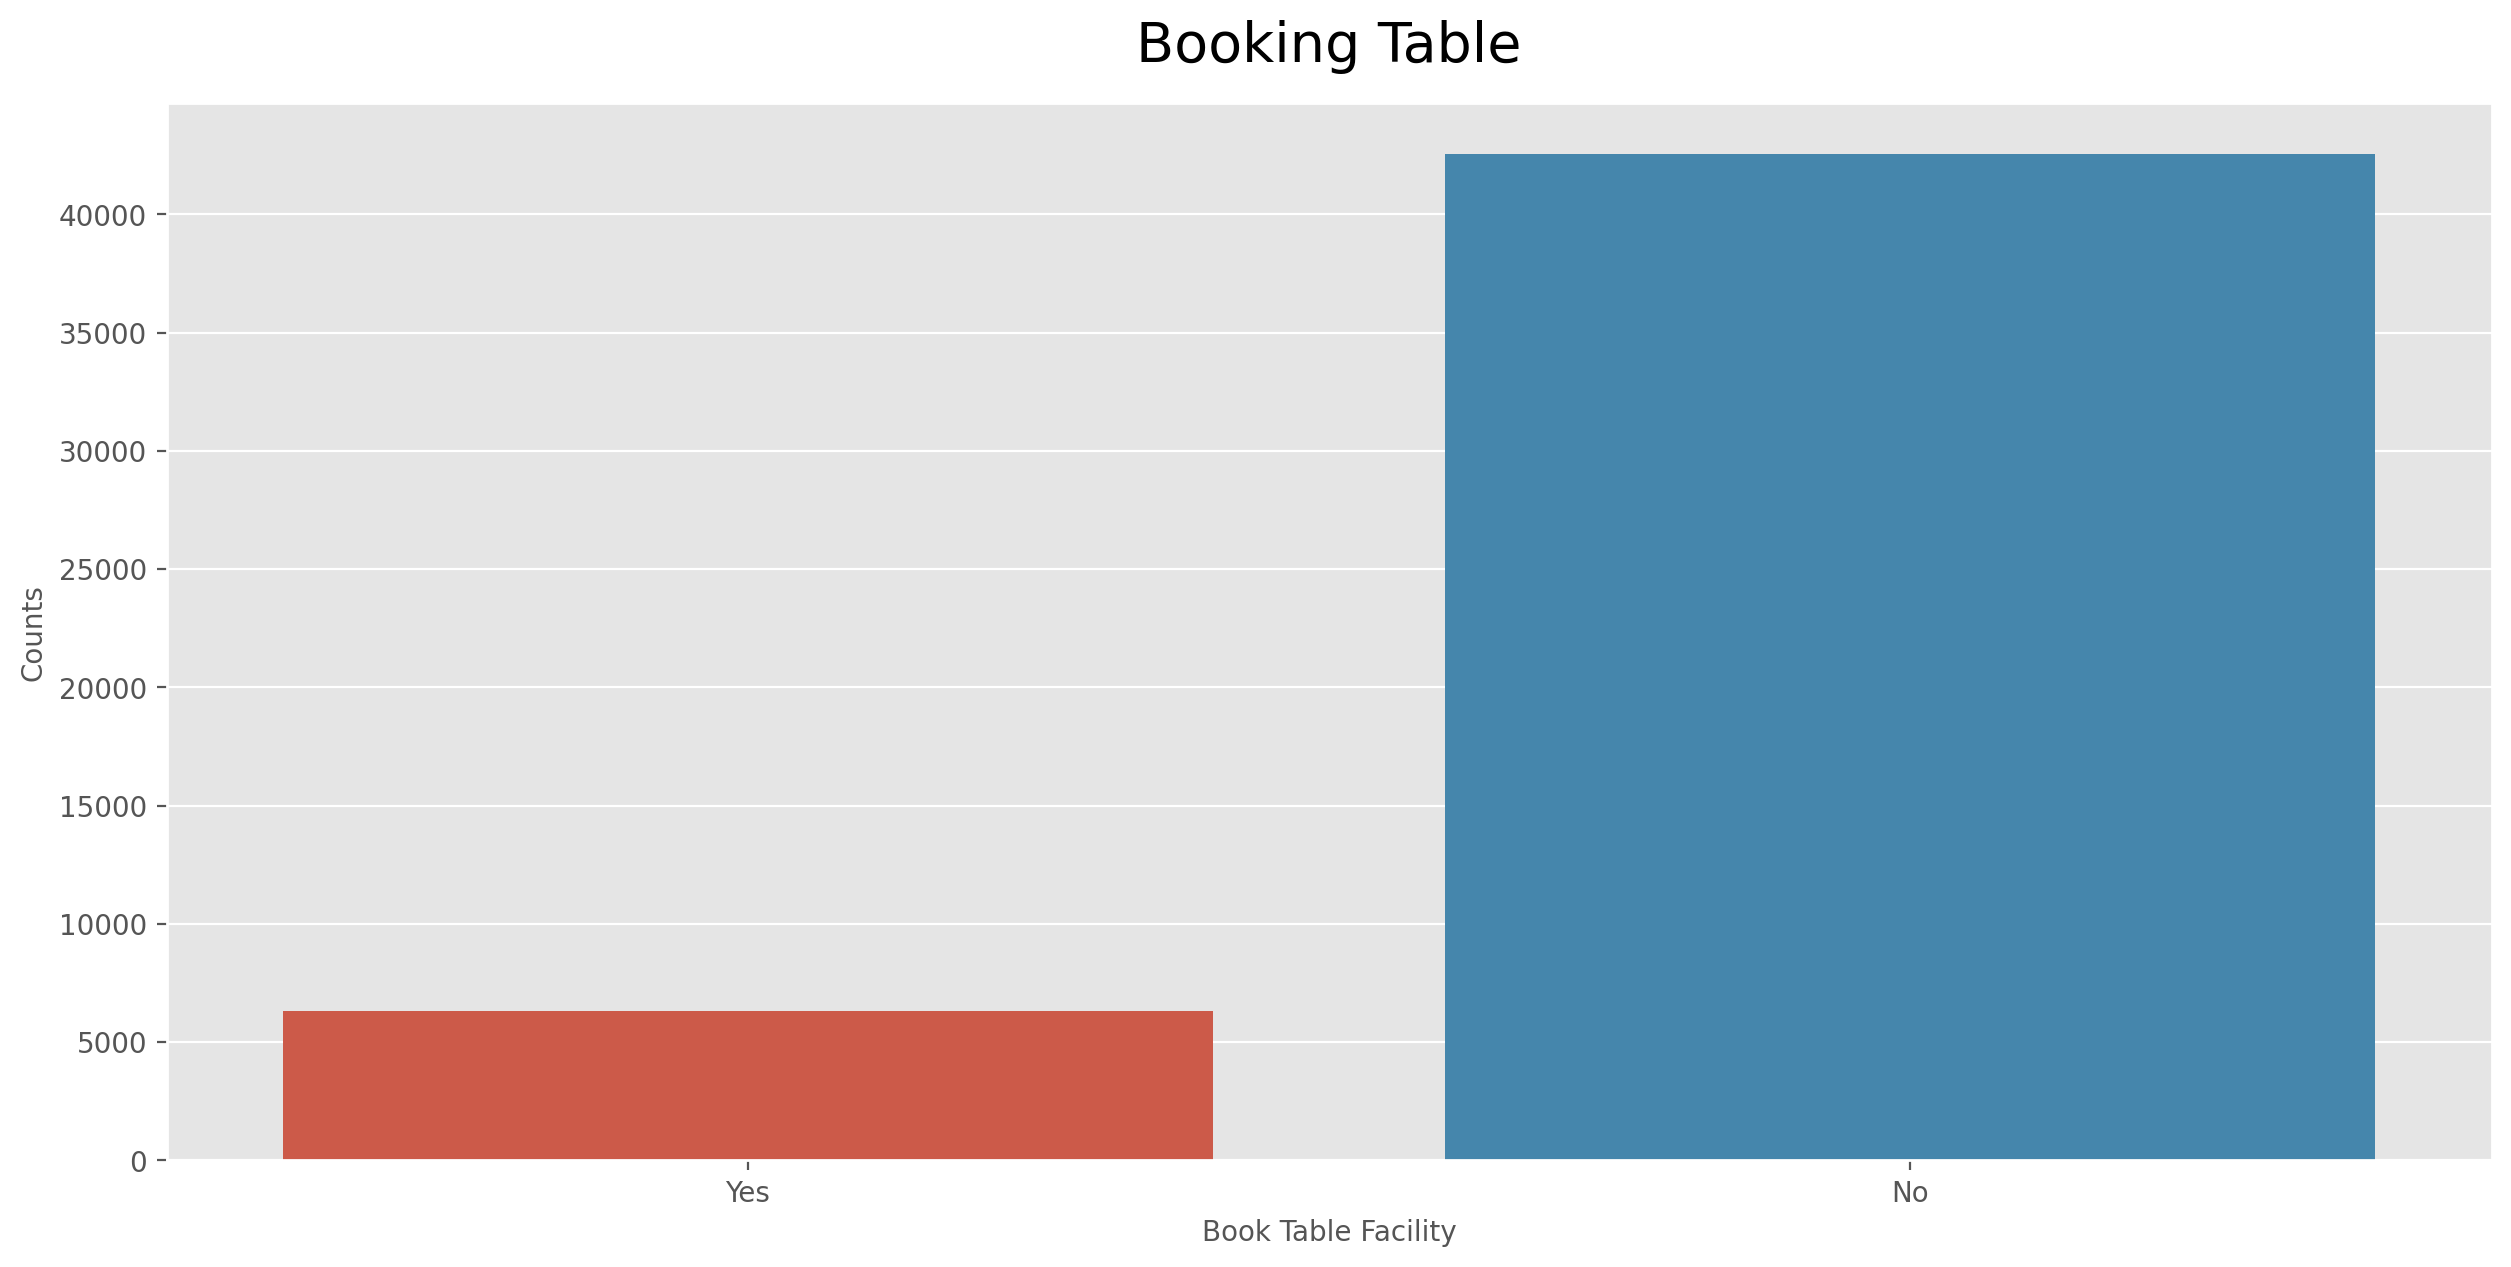

In [28]:
plt.figure(figsize = (15,7), dpi = 200)
sns.countplot('book_table', data = df)
plt.title('Booking Table', fontsize=20, pad=15)
plt.ylabel('Counts',size=10)
plt.xlabel('Book Table Facility',size=10)

Most of restaurants do not have Pre-booking table facility.

### No of restaurants in particular location

In [29]:
df.location.value_counts().head()

BTM                      4740
Koramangala 5th Block    2420
HSR                      2387
JP Nagar                 2087
Whitefield               1998
Name: location, dtype: int64

Text(0.5, 1.0, 'NO. of restaurants in a Location')

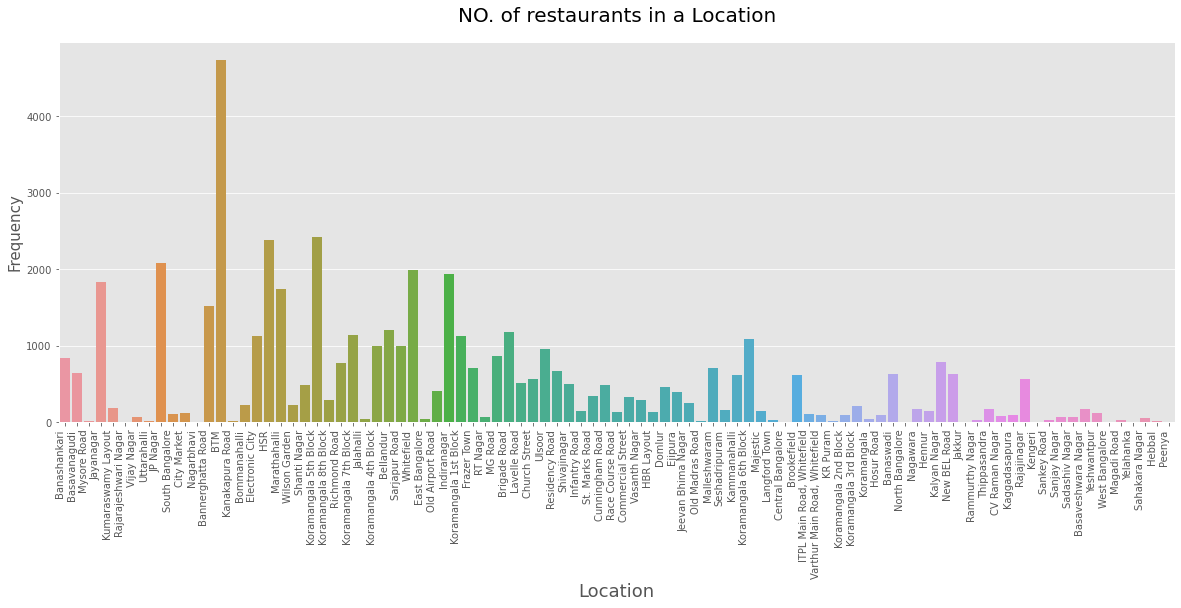

In [30]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x='location', data= df)
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha='right')
plt.ylabel('Frequency', size=15)
plt.xlabel('Location', size=18)
loc
plt.title('NO. of restaurants in a Location', size = 20, pad=20)

BTM area has maximum amount(4740) of restaurants compared to all other locations


### Types of restaurants in Banglore

In [31]:
df.rest_type.value_counts().head()

Quick Bites       17920
Casual Dining     10009
Cafe               3565
Delivery           2468
Dessert Parlor     2170
Name: rest_type, dtype: int64

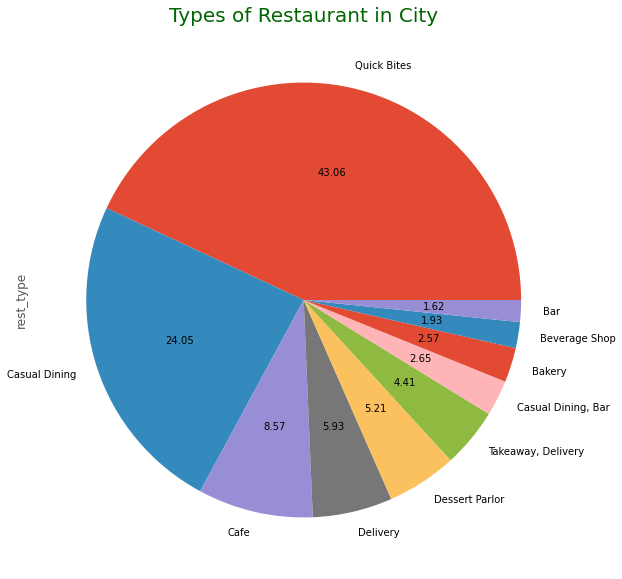

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(10,10))
ax = df.rest_type.value_counts()[:10]
label = df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie', labels=label, autopct='%.2f')
plt.title("Types of Restaurant in City", fontsize=20, color='darkgreen')
plt.show()

### Top 10 location restaurants

<AxesSubplot:>

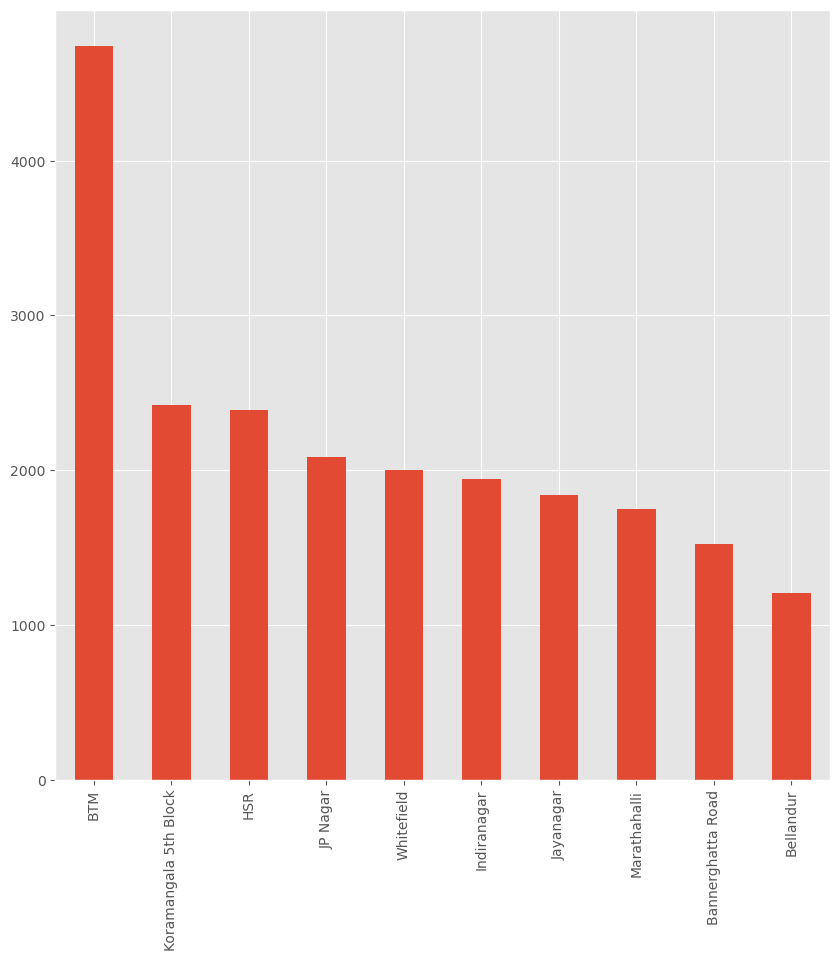

In [252]:
plt.figure(figsize=(10,10))
ax=df.location.value_counts()[:10]
ax.plot(kind='bar')

### Approx cost for 2 people distribution

Text(0, 0.5, 'Density')

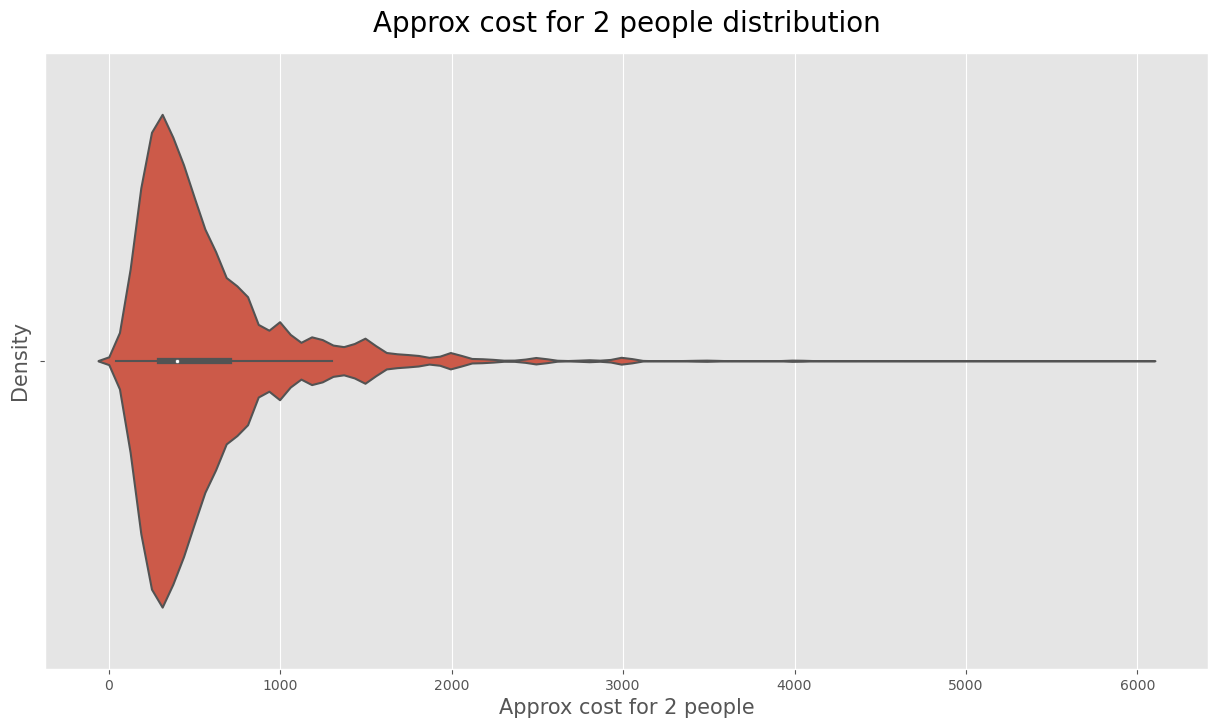

In [253]:
plt.figure(figsize=(15,8))
sns.violinplot(df.approx_cost_for_2_people)
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)

The approx cost for 2 people is around 300-400 INR

### Most popular cuisines of Banglore

Text(0.5, 0, 'No. of restaurants')

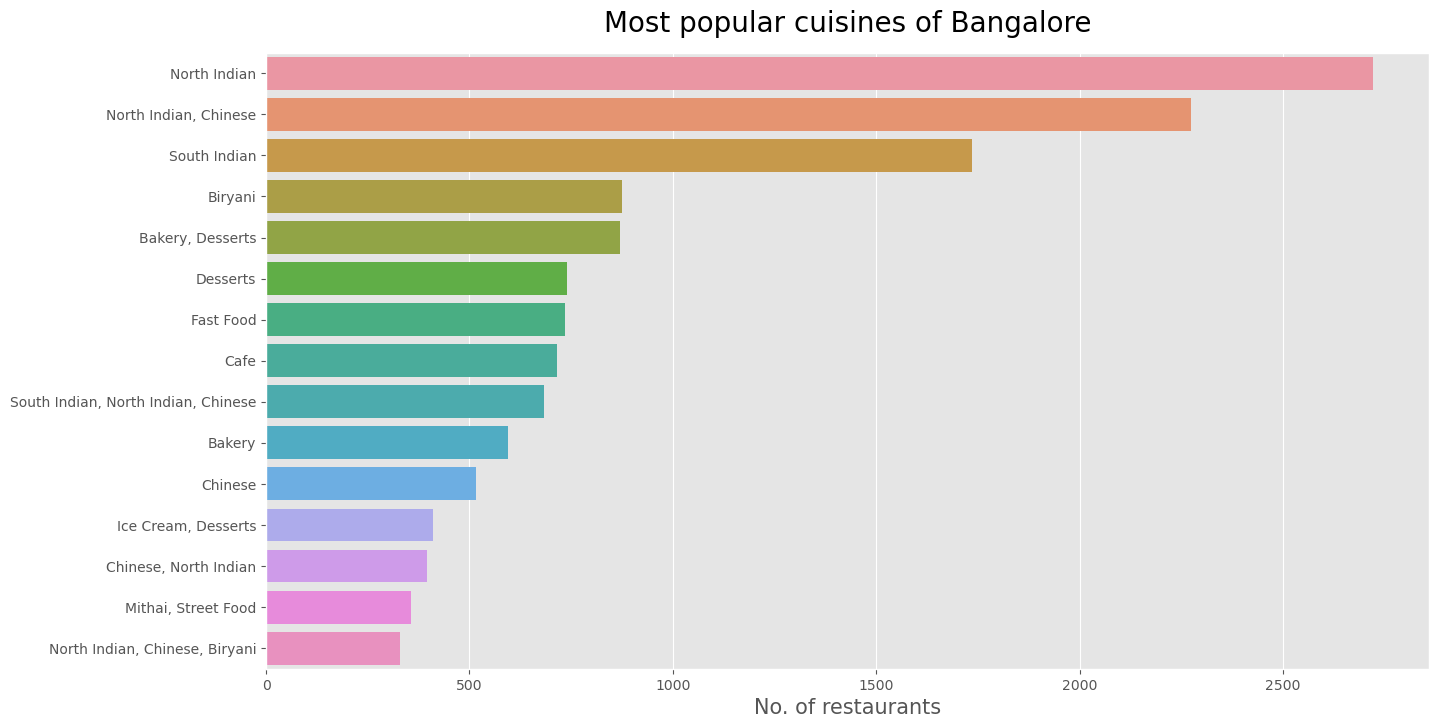

In [254]:
plt.figure(figsize=(15,8))
cuisines= df['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

Most popular cuisines of Banglore are:
- North Indian
- Noth Indian, Chinese
- South Indian

### Most famous / Favourite dish in restaurants

In [34]:
df.dish_liked.nunique()

5198

In [35]:
df1 = df.copy()

dishes_data = df[df.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [36]:
dishes_data.isnull().sum()

name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
dish_liked                  0
cuisines                    0
approx_cost_for_2_people    0
listed_in_type              0
listed_in_city              0
dtype: int64

In [37]:
dishes_data.dish_liked[:10]

0     pasta, lunch buffet, masala papad, paneer laja...
1     momos, lunch buffet, chocolate nirvana, thai g...
2     churros, cannelloni, minestrone soup, hot choc...
3                                           masala dosa
4                                   panipuri, gol gappe
5     onion rings, pasta, kadhai paneer, salads, sal...
7     farmhouse pizza, chocolate banana, virgin moji...
8     pizza, mocktails, coffee, nachos, salad, pasta...
9     waffles, pasta, coleslaw sandwich, choco waffl...
10    waffles, pasta, crispy chicken, honey chilli c...
Name: dish_liked, dtype: object

- We can see that each row has contained multiple dishes seperated by "Commma"

In [38]:
#count each dish to see how many times each dish repeated

dish_count = []
for i in dishes_data.dish_liked:   #iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # Removing the white spaces to get accurate result
        dish_count.append(t)


In [39]:
dish_count[:10]  # Let's see favourite top 10 dishes 

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

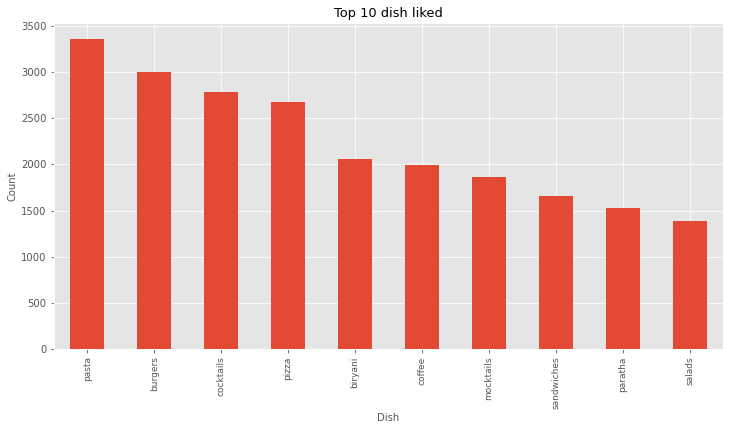

In [40]:
plt.figure(figsize = (12,6))
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.xlabel('Dish', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Top 10 dish liked', fontsize = 13)
plt.xticks(fontsize = 9, rotation=90)
plt.savefig('Dishliked.png')
plt.show()

- We can see that 'pasta' is most favourite dish followed by 'burger' followed by 'cocktails. 

In [262]:
from wordcloud import WordCloud

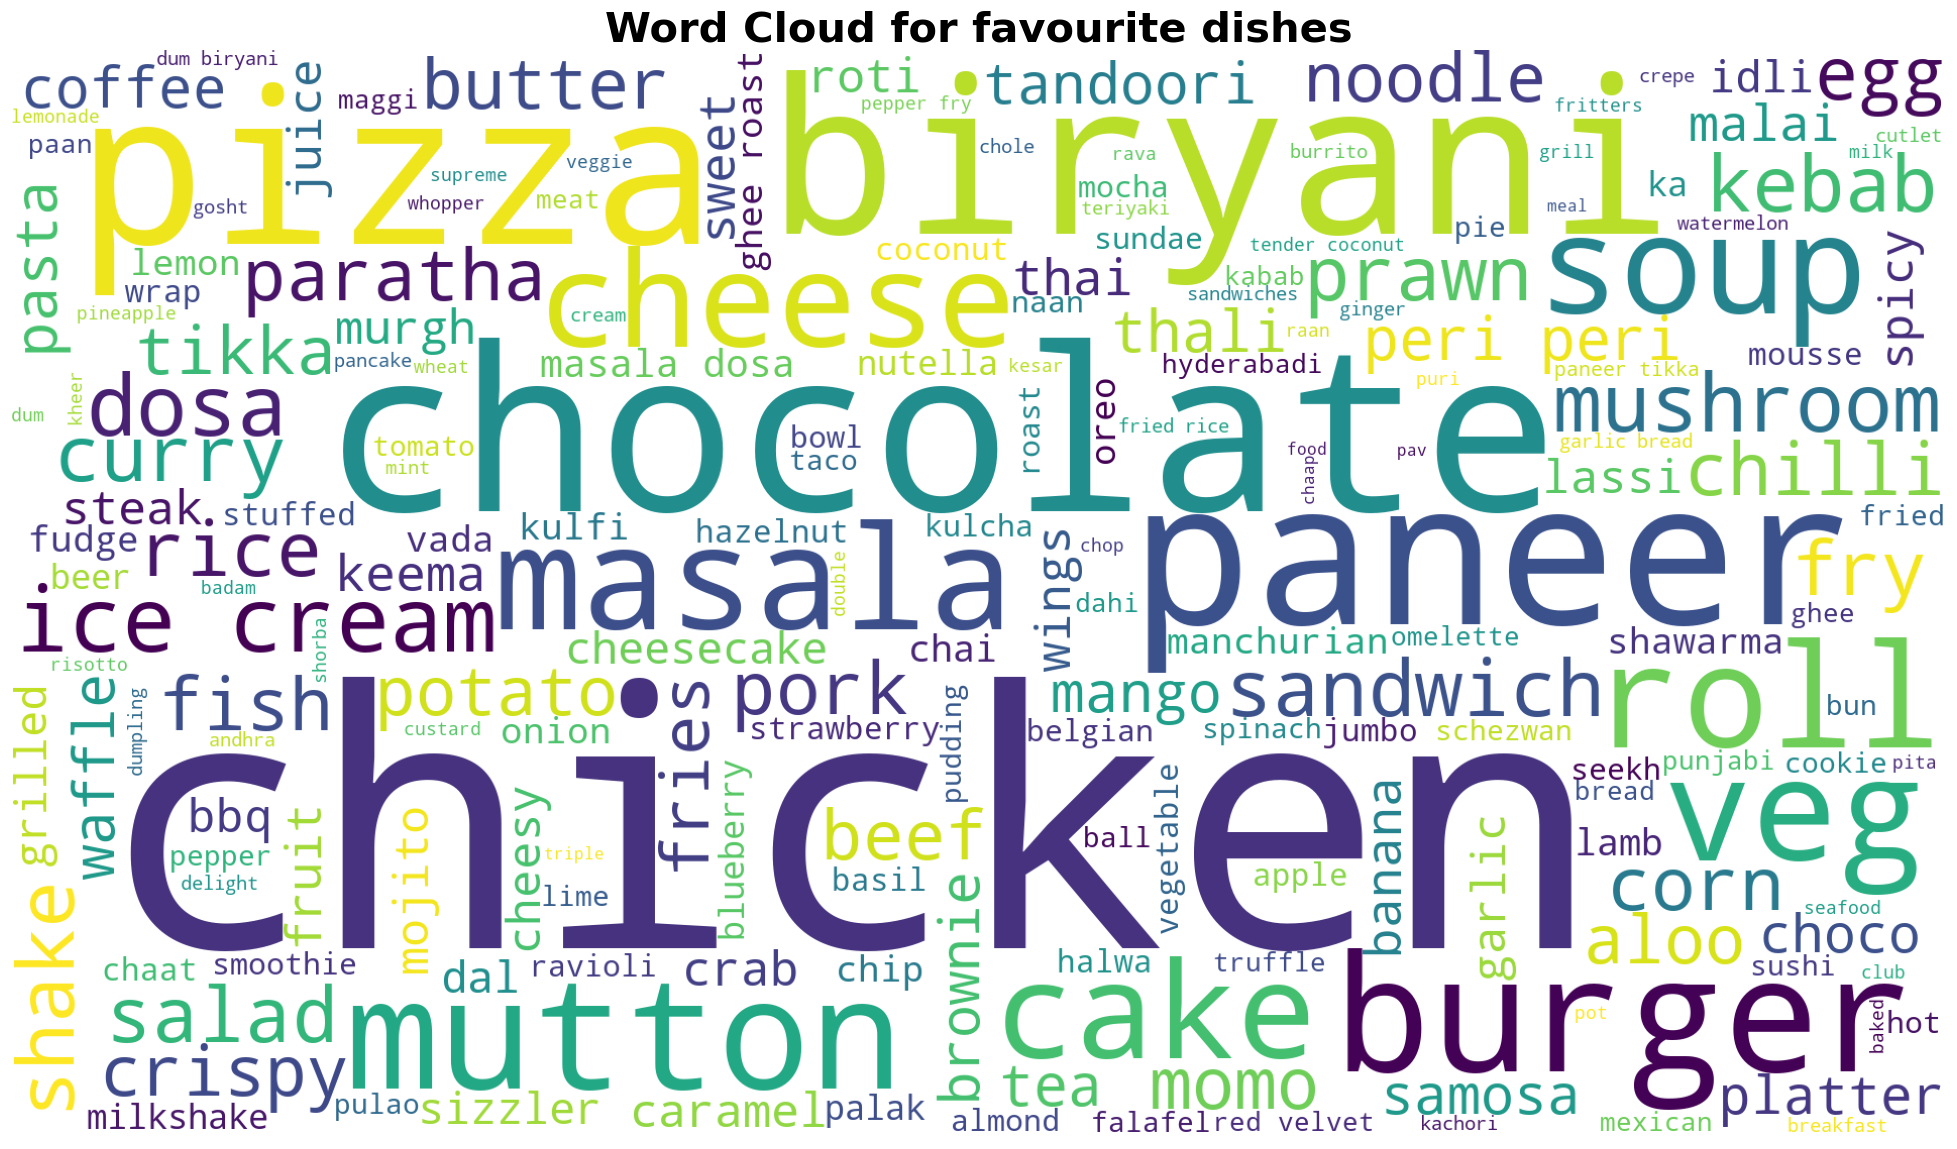

In [263]:
dish_set = set(dish_count)

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dish_set))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.title('Word Cloud for favourite dishes', weight = 'bold', fontsize = 30)
plt.show()

## Model

##### Building Machine Learning Model

In [264]:
#Convert categorical columns to numerical columns using label encoding

In [265]:
df.drop(columns=['name','dish_liked', 'listed_in_type', 'listed_in_city'], inplace=True)
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_people
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [266]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [267]:
list1=['online_order','book_table','location','rest_type','cuisines']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_people
0,1,1,4.1,775,1,27,2075,800.0
1,1,0,4.1,787,1,27,917,800.0
2,1,0,3.8,918,1,22,738,800.0
3,0,0,3.7,88,1,78,2451,300.0
4,0,0,3.8,166,4,27,2103,600.0


## Data Transformation

In [268]:
#Scaling
df.shape

(48878, 8)

In [269]:
# selecing features
x = df.drop(['rate'],axis=1)
x.shape

(48878, 7)

In [270]:
x.dtypes

online_order                  int32
book_table                    int32
votes                         int64
location                      int32
rest_type                     int32
cuisines                      int32
approx_cost_for_2_people    float64
dtype: object

In [271]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70201149, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [272]:
#selecting target variable
y = df['rate'].values
y

array([4.1       , 4.1       , 3.8       , ..., 3.70201149, 4.3       ,
       3.4       ])

In [273]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [274]:
x = StandardScaler().fit(x).transform(x)
x

array([[ 0.82053261,  2.59496835,  0.57968075, ..., -0.86872408,
         0.98744019,  0.53605592],
       [ 0.82053261, -0.38536115,  0.5942685 , ..., -0.86872408,
        -0.57516771,  0.53605592],
       [ 0.82053261, -0.38536115,  0.75351814, ..., -1.05032968,
        -0.81671073,  0.53605592],
       ...,
       [-1.2187206 , -0.38536115, -0.362445  , ..., -1.55882536,
        -0.00571993,  3.2376464 ],
       [-1.2187206 ,  2.59496835, -0.07555251, ..., -1.55882536,
        -0.00571993,  4.3633091 ],
       [-1.2187206 , -0.38536115, -0.3466416 , ..., -1.48618312,
         0.02801513,  2.1119837 ]])

## Splitting the data

In [275]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [276]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing  Data Shape   : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (36658, 7)
Training Labels Shape :  (36658,)
Testing  Data Shape   :  (12220, 7)
Testing Labels Shape  :  (12220,)


## Applying Regression models

### 1. Linear Regression

In [277]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [278]:
#Train the model on train set
lin_reg.fit(x_train,y_train)

LinearRegression()

In [279]:
#Check the model socre on train and test set
print(lin_reg.score(x_train,y_train))
print(lin_reg.score(x_test,y_test))

0.27618624481326415
0.2720937312691395


In [280]:
#New predict
lin_reg_pred=lin_reg.predict(x_test)

In [281]:
from sklearn.metrics import r2_score
lin_reg_score = r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 27.20937312691395


### 2. Ridge Regression

In [282]:
from sklearn.linear_model import Ridge

In [283]:
rr=Ridge()
rr

Ridge()

In [284]:
rr.fit(x_train,y_train)
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

0.2761862447288408
0.27209416379362095


In [285]:
rr_pred=rr.predict(x_test)

In [286]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 27.209416379362096


### 3. Random Forest Regressor

In [287]:
from sklearn.ensemble import RandomForestRegressor

In [288]:
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [289]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [290]:
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9894347179832386
0.9253274191497383


In [291]:
rfr_pred = rfr.predict(x_test)

In [292]:
from sklearn.metrics import r2_score

rfr_score = r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 92.53274191497383


### 5. Support Vector Regression

In [293]:
from sklearn.svm import SVR

In [294]:
#svr = SVR()
#svr.fit(x_train,y_train)

SVR()

In [295]:
#print(svr.score(x_train,y_train))
#print(svr.score(x_test,y_test))

0.3998782425035121
0.40333803313392635


In [296]:
#svr_pred=svr.predict(x_test)

In [297]:
#from sklearn.metrics import r2_score

#svr_score=r2_score(y_test,svr_pred)*100
#print("Accuracy score for LR :",svr_score)

Accuracy score for LR : 40.333803313392636


In [298]:
#pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,27.209373
1,Ridge Reg,27.209416
2,RandomForest Reg,92.532742
3,Support Vector Reg,40.333803


## From above data we can see that the "Random Forest Regressor" Given the **highest Accuacry** score



## PREDICT THE RATING with Random Forest Regressor Model


In [300]:
rfr.predict([[1,1,775,1,27,2075,800]])

array([4.243])

#### We got 4.2 Rating for out first predict over model

In [302]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,3.700000,3.70
1,3.702011,3.70
2,4.000000,3.66
3,3.702011,3.70
4,3.900000,3.92
...,...,...
12215,2.800000,3.19
12216,3.100000,3.26
12217,3.800000,3.77
12218,3.300000,3.34


## AS you can see Our model is working good its predicted Ratings is Nearly to the Actual Ratings

### Save Ratings Sample as a CSV file

In [303]:
sample.to_csv("Model Prediction Sample.csv",index=False)